# Įvadas į tikimybių teoriją ir statistiką
Šiame užrašų knygelėje mes praktiškai pritaikysime kai kurias anksčiau aptartas sąvokas. Daugelis tikimybių teorijos ir statistikos sąvokų yra puikiai atvaizduotos pagrindinėse duomenų apdorojimo bibliotekose Python kalboje, tokiose kaip `numpy` ir `pandas`.


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Atsitiktiniai kintamieji ir pasiskirstymai
Pradėkime nuo 30 reikšmių imties paėmimo iš tolygaus pasiskirstymo nuo 0 iki 9. Taip pat apskaičiuosime vidurkį ir dispersiją.


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


Norėdami vizualiai įvertinti, kiek skirtingų reikšmių yra imtyje, galime nubraižyti **histogramą**:


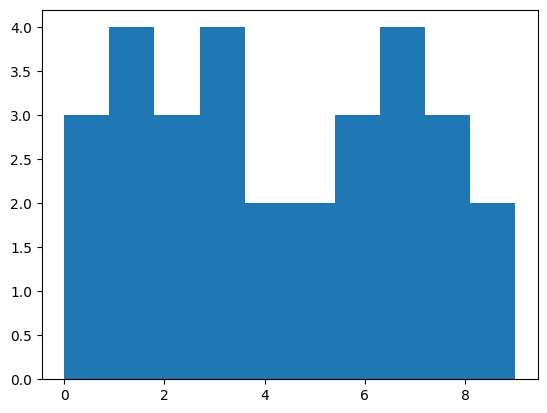

In [119]:
plt.hist(sample)
plt.show()

## Tikrų duomenų analizė

Vidurkis ir dispersija yra labai svarbūs analizuojant realius duomenis. Pakraukime duomenis apie beisbolo žaidėjus iš [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


> Šiame kurse naudojame paketą [**Pandas**](https://pandas.pydata.org/) duomenų analizei. Vėliau kurse daugiau kalbėsime apie Pandas ir darbą su duomenimis Python kalba.

Apskaičiuokime vidutines amžiaus, ūgio ir svorio reikšmes:


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

Dabar sutelkime dėmesį į ūgį ir apskaičiuokime standartinį nuokrypį bei dispersiją:


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


Be vidurkio, prasminga atsižvelgti į medianos reikšmę ir kvartilius. Juos galima vizualizuoti naudojant **dėžės diagramą**:


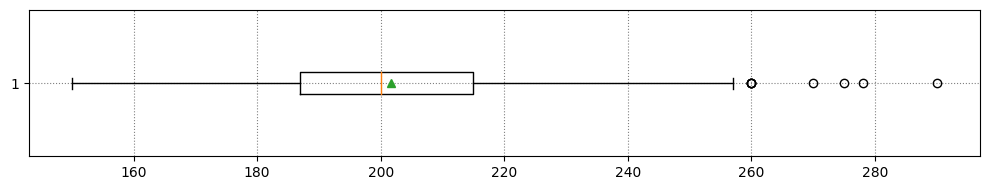

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

Mes taip pat galime sudaryti dėžutės diagramas iš mūsų duomenų rinkinio poskyrių, pavyzdžiui, suskirstytų pagal žaidėjo vaidmenį.


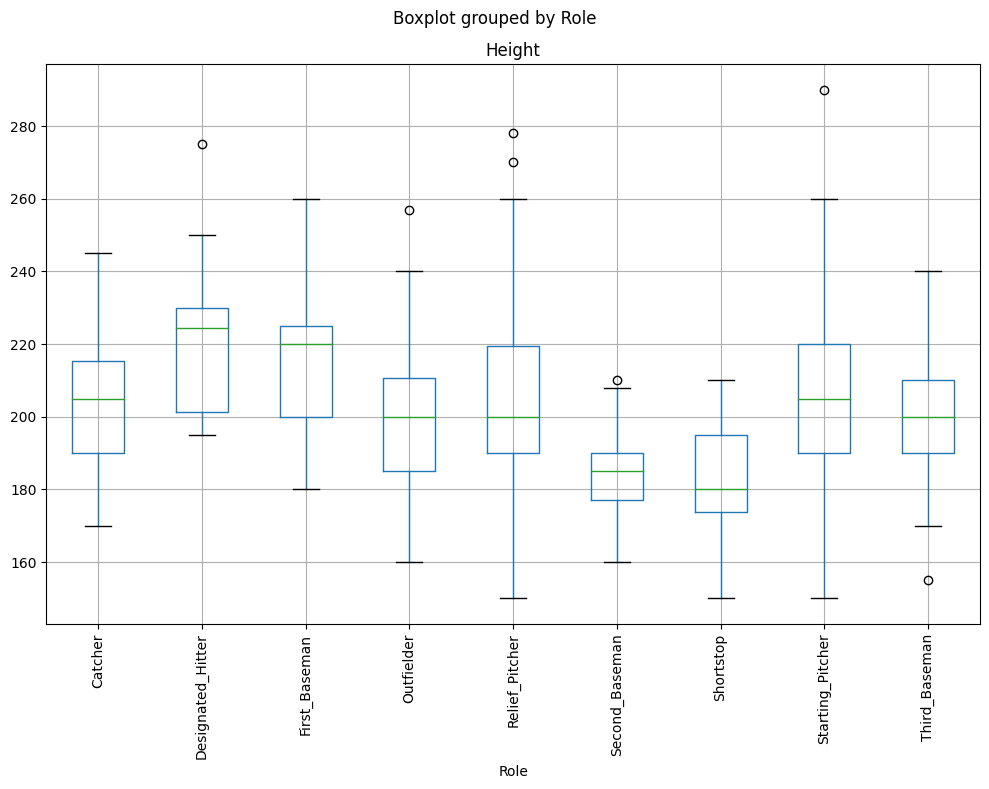

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **Pastaba**: Ši diagrama rodo, kad vidutiniškai pirmosios bazės žaidėjų ūgis yra didesnis nei antrosios bazės žaidėjų ūgis. Vėliau sužinosime, kaip formaliau patikrinti šią hipotezę ir kaip įrodyti, kad mūsų duomenys yra statistiškai reikšmingi, kad tai parodytų.

Amžius, ūgis ir svoris yra visi nenutrūkstami atsitiktiniai kintamieji. Kaip manote, kokia yra jų pasiskirstymo forma? Geras būdas tai sužinoti – nubraižyti reikšmių histogramą:


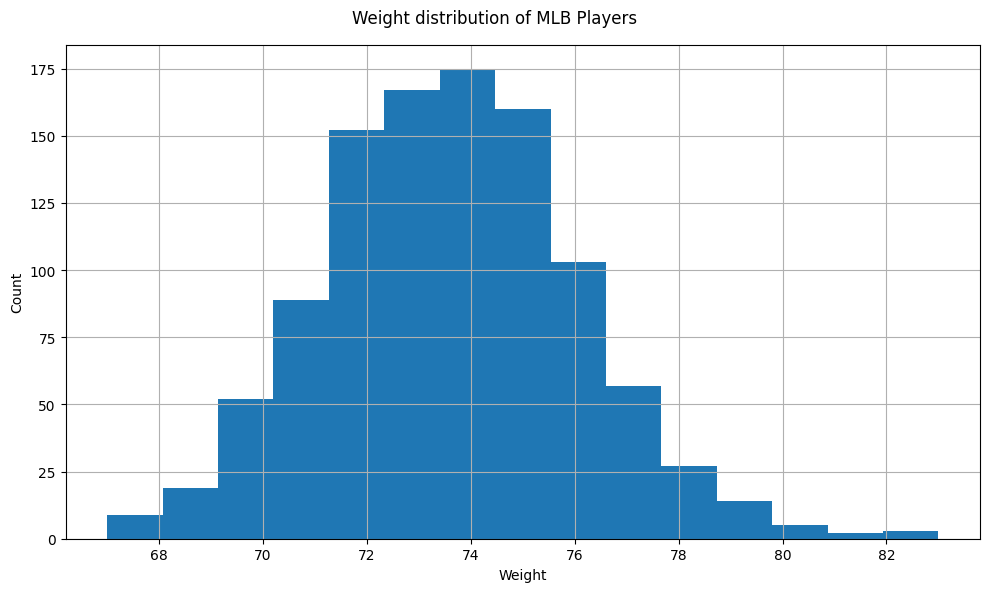

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Normali skirstinys

Sukurkime dirbtinį svorių pavyzdį, kuris atitinka normalųjį skirstinį su tokia pačia vidurkiu ir dispersija kaip mūsų tikrieji duomenys:


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

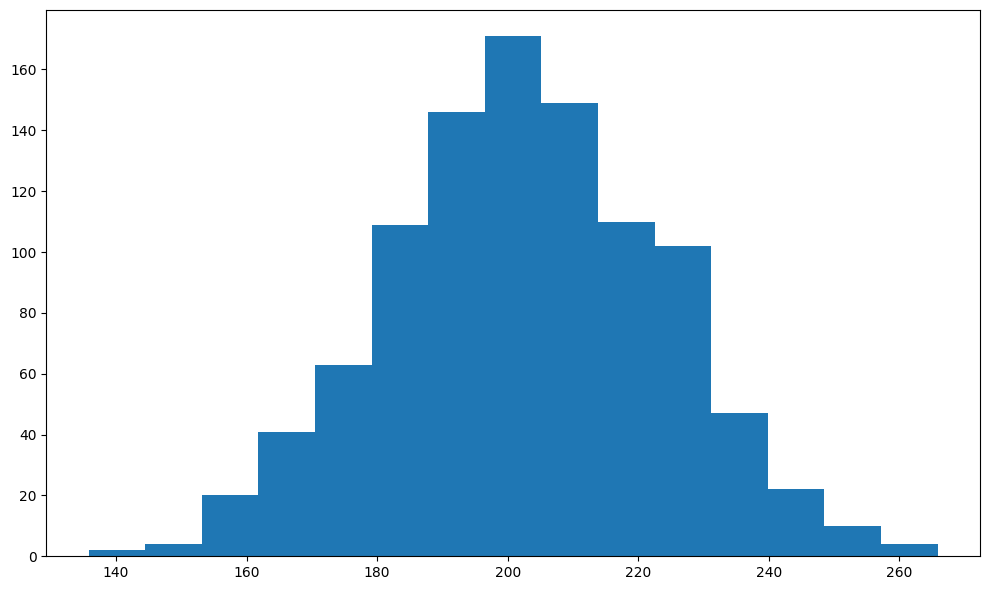

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

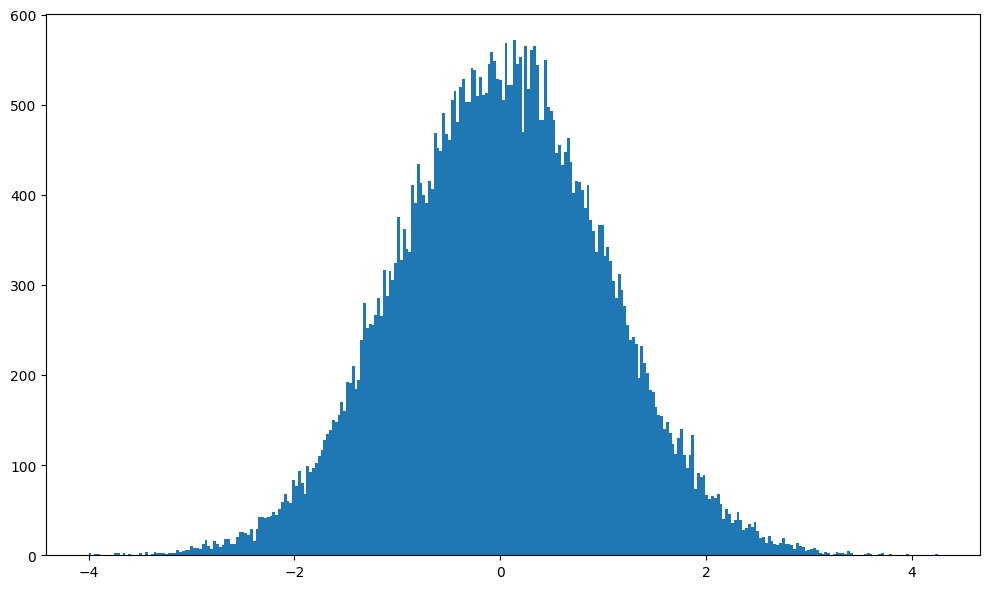

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

Kadangi dauguma realių gyvenimo reikšmių yra normaliai pasiskirsčiusios, neturėtume naudoti vienodo atsitiktinių skaičių generatoriaus mėginių duomenims generuoti. Štai kas nutinka, jei bandome generuoti svorius su vienodu pasiskirstymu (generuojamu naudojant `np.random.rand`):


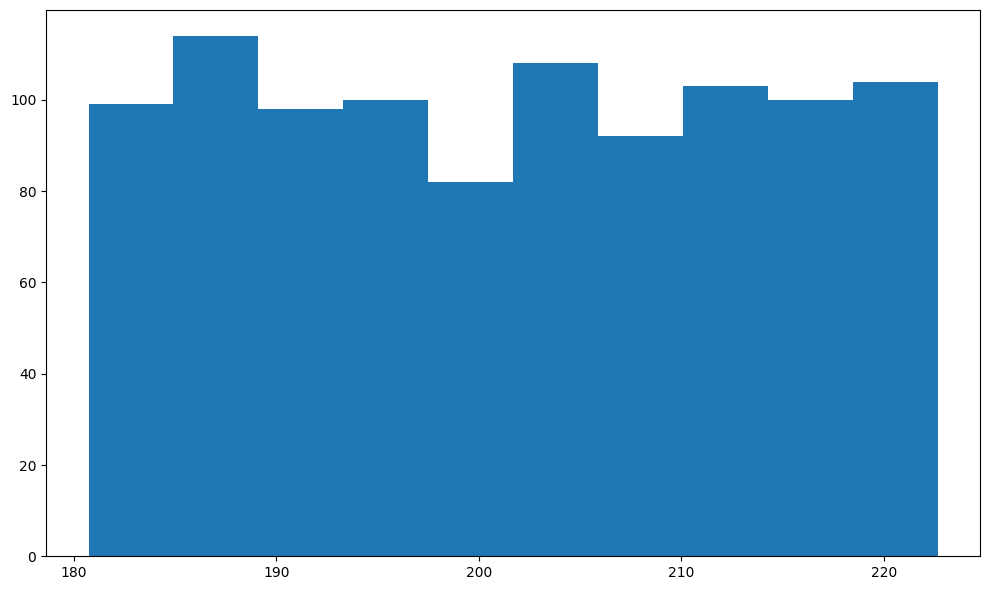

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## Pasitikėjimo intervalai

Dabar apskaičiuokime pasitikėjimo intervalus beisbolo žaidėjų svoriams ir ūgiams. Naudosime kodą [iš šios stackoverflow diskusijos](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## Hipotezių tikrinimas

Pažvelkime į skirtingus vaidmenis mūsų beisbolo žaidėjų duomenų rinkinyje:


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


Galime matyti, kad intervalai nesikerta.

Statistiškai tikslesnis būdas hipotezei patikrinti yra naudoti **Studento t-testą**:


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


Funkcija `ttest_ind` grąžina dvi reikšmes:  
* p-reikšmė gali būti laikoma tikimybe, kad dvi skirstiniai turi tą pačią vidutinę reikšmę. Mūsų atveju ji yra labai maža, o tai reiškia, kad yra stiprių įrodymų, jog pirmos bazės žaidėjai yra aukštesni.  
* t-reikšmė yra normalizuoto vidurkio skirtumo tarpinė reikšmė, kuri naudojama t-teste ir lyginama su slenkstine reikšme, atitinkančia tam tikrą pasitikėjimo lygį.  


## Normalaus pasiskirstymo simuliavimas naudojant Centrinės ribos teoremą

Pseudo-atsitiktinių skaičių generatorius Python'e yra sukurtas taip, kad suteiktų mums vienodą pasiskirstymą. Jei norime sukurti generatorių normaliam pasiskirstymui, galime pasinaudoti Centrinės ribos teorema. Norėdami gauti normaliai pasiskirsčiusį reikšmę, tiesiog apskaičiuosime vienodai generuoto mėginio vidurkį.


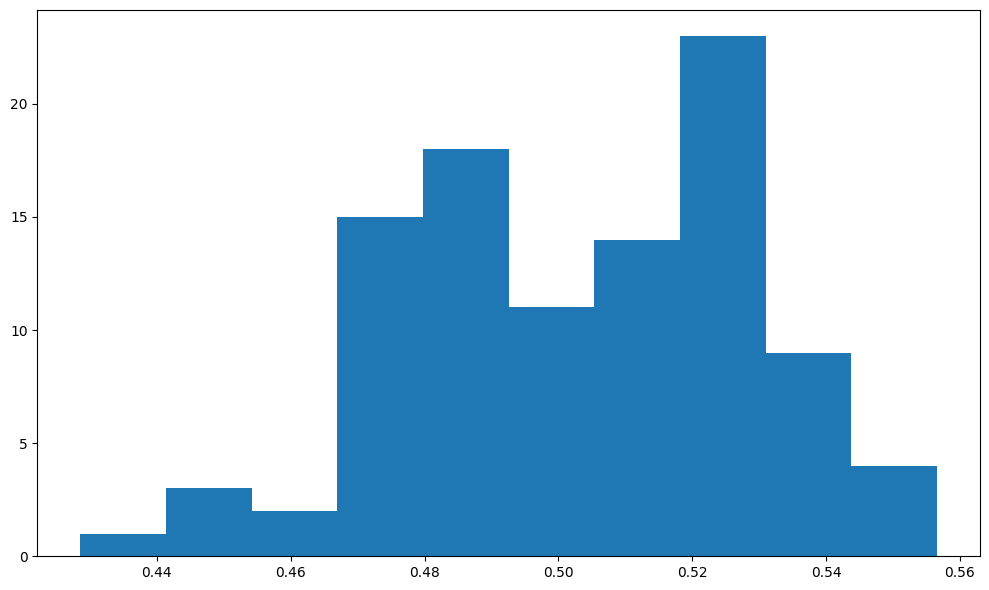

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## Koreliacija ir Piktoji Beisbolo Korporacija

Koreliacija leidžia mums nustatyti ryšius tarp duomenų sekų. Mūsų žaisliniame pavyzdyje įsivaizduokime, kad egzistuoja piktoji beisbolo korporacija, kuri moka savo žaidėjams pagal jų ūgį – kuo aukštesnis žaidėjas, tuo daugiau pinigų jis/ji gauna. Tarkime, kad yra bazinis atlyginimas – 1000 $, ir papildomas priedas nuo 0 $ iki 100 $, priklausomai nuo ūgio. Paimsime tikrus MLB žaidėjus ir apskaičiuosime jų įsivaizduojamus atlyginimus:


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


Dabar apskaičiuokime tų sekų kovariaciją ir koreliaciją. `np.cov` pateiks vadinamąją **kovariacijos matricą**, kuri yra kovariacijos išplėtimas keliems kintamiesiems. Kovariacijos matricos $M$ elementas $M_{ij}$ yra įvesties kintamųjų $X_i$ ir $X_j$ koreliacija, o diagonalės reikšmės $M_{ii}$ yra $X_{i}$ dispersija. Panašiai, `np.corrcoef` pateiks **koreliacijos matricą**.


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


Koreliacija, lygi 1, reiškia, kad tarp dviejų kintamųjų yra stiprus **linijinis ryšys**. Linijinį ryšį galime vizualiai pamatyti, nubraižydami vieną reikšmę prieš kitą:


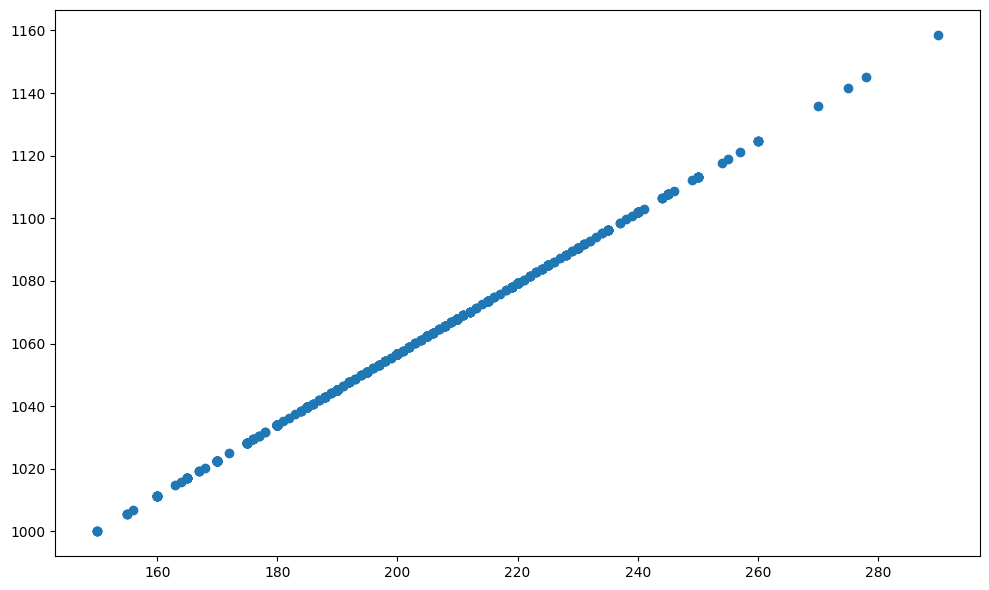

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


Šiuo atveju koreliacija yra šiek tiek mažesnė, tačiau vis dar gana didelė. Dabar, norėdami padaryti ryšį dar mažiau akivaizdų, galime pridėti šiek tiek papildomo atsitiktinumo, pridėdami atsitiktinį kintamąjį prie atlyginimo. Pažiūrėkime, kas nutiks:


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


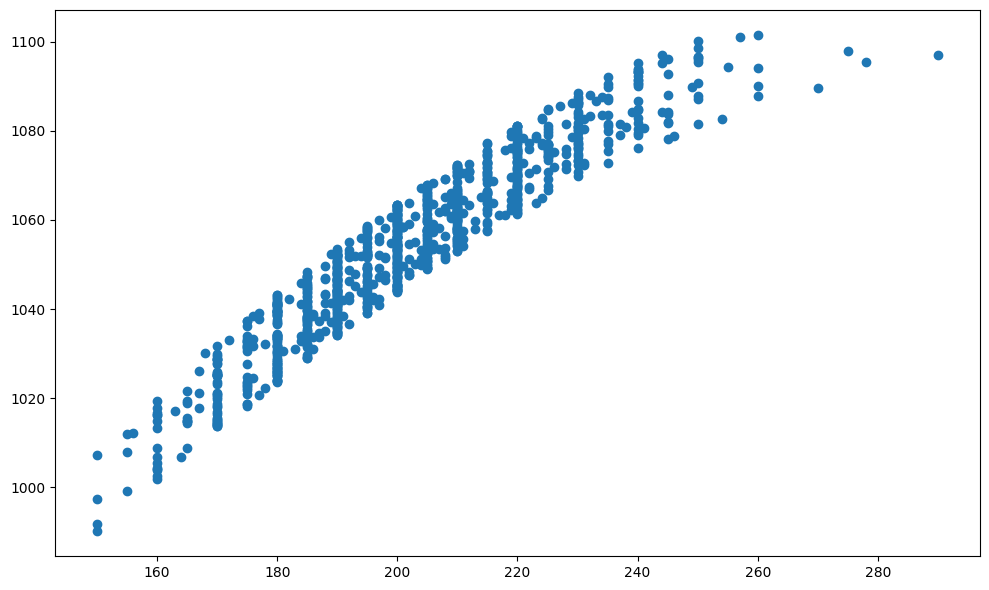

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

> Ar galite atspėti, kodėl taškai išsirikiuoja į vertikalias linijas taip?

Mes pastebėjome ryšį tarp dirbtinai sukurto koncepto, kaip atlyginimas, ir stebimojo kintamojo *ūgis*. Pažiūrėkime, ar du stebimieji kintamieji, tokie kaip ūgis ir svoris, taip pat koreliuoja:


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

Deja, negavome jokių rezultatų – tik keletą keistų `nan` reikšmių. Taip nutiko dėl to, kad kai kurios mūsų serijos reikšmės yra neapibrėžtos, pažymėtos kaip `nan`, todėl operacijos rezultatas taip pat tampa neapibrėžtas. Pažvelgę į matricą matome, kad `Weight` yra probleminė stulpelis, nes buvo apskaičiuota savikoreliacija tarp `Height` reikšmių.

> Šis pavyzdys parodo, kokia svarbi yra **duomenų paruošimas** ir **valymas**. Be tinkamų duomenų negalime nieko apskaičiuoti.

Naudokime `fillna` metodą, kad užpildytume trūkstamas reikšmes, ir apskaičiuokime koreliaciją:


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

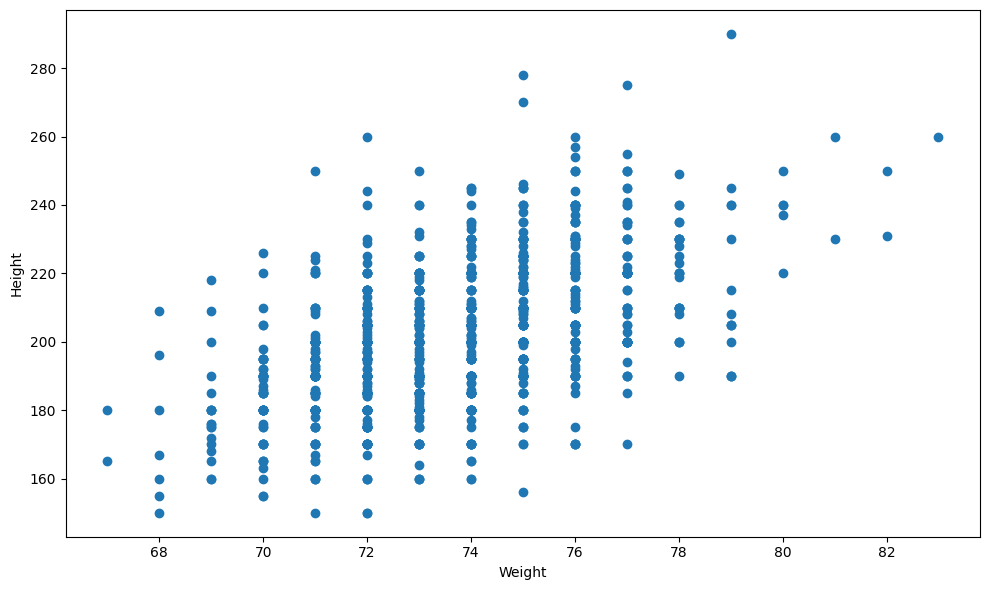

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## Išvada

Šiame užrašų knygelėje išmokome atlikti pagrindines operacijas su duomenimis, kad apskaičiuotume statistines funkcijas. Dabar žinome, kaip naudoti patikimą matematikos ir statistikos aparatą, siekiant patvirtinti tam tikras hipotezes, ir kaip apskaičiuoti pasikliautinuosius intervalus atsitiktiniams kintamiesiems, remiantis duomenų imtimi.



---

**Atsakomybės apribojimas**:  
Šis dokumentas buvo išverstas naudojant dirbtinio intelekto vertimo paslaugą [Co-op Translator](https://github.com/Azure/co-op-translator). Nors siekiame tikslumo, atkreipiame dėmesį, kad automatiniai vertimai gali turėti klaidų ar netikslumų. Originalus dokumentas jo gimtąja kalba turėtų būti laikomas autoritetingu šaltiniu. Kritinei informacijai rekomenduojama naudotis profesionalių vertėjų paslaugomis. Mes neprisiimame atsakomybės už nesusipratimus ar klaidingus aiškinimus, kylančius dėl šio vertimo naudojimo.
